In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
orders = pd.read_csv('Orders.csv')
returns = pd.read_csv('Returns.csv')

In [42]:
orders.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,$221.98,2,0.0,$62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","$3,709.40",9,0.1,-$288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID","$5,175.17",9,0.1,$919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless","$2,892.51",5,0.1,-$96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed","$2,832.96",8,0.0,$311.52,903.04,Critical


In [43]:
orders.describe()

,Row.ID,Postal.Code,Quantity,Discount,Shipping.Cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,3.476545,0.142908,26.478567
std,14806.29199,32063.693350,2.278766,0.212280,57.251373
min,1.00000,1040.000000,1.000000,0.000000,1.002000
25%,12823.25000,23223.000000,2.000000,0.000000,2.610000
50%,25645.50000,56430.500000,3.000000,0.000000,7.790000
75%,38467.75000,90008.000000,5.000000,0.200000,24.450000
max,51290.00000,99301.000000,14.000000,0.850000,933.570000


In [48]:
min(orders.Profit)

-6599.9799999999996

In [45]:
orders.Sales = list(map(lambda x: x.replace('$', ''),orders.Sales))
orders.Sales = list(map(lambda x: x.replace(',',''), orders.Sales))
orders.Sales = list(map(lambda x: float(x),orders.Sales))

In [46]:
orders.Profit = list(map(lambda x: x.replace('$', ''),orders.Profit))
orders.Profit = list(map(lambda x: x.replace(',',''), orders.Profit))
orders.Profit = list(map(lambda x: float(x),orders.Profit))

In [61]:
orders['Order.Date'] = pd.to_datetime(orders['Order.Date']).dt.to_period('M')

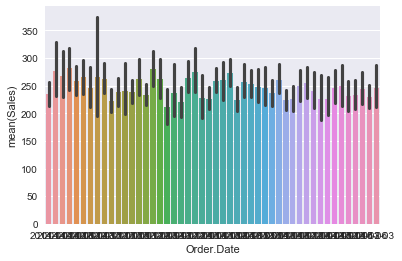

In [127]:
sns.barplot(orders['Order.Date'], orders['Sales'])

In [124]:
sns.countplot(x='month', y='Quantity', data=orders)

TypeError: Cannot pass values for both `x` and `y`

In [106]:
orders['month'] = orders['Order.Date'].dt.month

In [129]:
orders['year'] = orders['Order.Date'].dt.year

In [130]:
orders[orders['Profit'] < 0].groupby('year').sum()

,Row.ID,Postal.Code,Sales,Quantity,Discount,Profit,Shipping.Cost,month
year,,,,,,,,
2012,59306070,21435771.0,476258.87,7590,1022.520,-169308.97,50064.7185,16986
2013,69225465,22085395.0,521740.10,9285,1201.688,-195342.99,57714.2240,20031
2014,82009725,26298034.0,654948.27,11489,1490.894,-245908.22,71864.9250,24580
2015,110997386,34940191.0,835956.31,14618,1938.842,-310089.68,88672.7820,32479


In [131]:
returns.head()

,Returned,Order ID,Region
0,Yes,CA-2012-SA20830140-41210,Central US
1,Yes,IN-2012-PB19210127-41259,Eastern Asia
2,Yes,CA-2012-SC20095140-41174,Central US
3,Yes,IN-2015-JH158207-42140,Oceania
4,Yes,IN-2014-LC168857-41747,Oceania


In [140]:
df = pd.merge(orders, returns, left_on='Order.ID', right_on = 'Order ID', how='outer')

In [152]:
df[df['Returned'] == 'Yes'].groupby('year').sum()

,Row.ID,Postal.Code,Sales,Quantity,Discount,Profit,Shipping.Cost,month
year,,,,,,,,
2012,11019108,5512777.0,111935.81,1457,66.968,17477.26,12636.185,3390
2013,10678896,5025481.0,96575.21,1508,66.860,9269.89,11137.672,3353
2014,15493169,7994617.0,133737.41,2096,81.714,17510.63,15856.426,4418
2015,19394127,7911427.0,183683.98,2614,110.986,17112.97,21212.313,5888


In [154]:
returned = df[df['Returned'] == 'Yes']

In [179]:
num_returned = returned[['Returned','Customer.ID']].groupby('Customer.ID').count().reset_index()
print(len(num_returned[num_returned['Returned']>1]))
print(len(num_returned[num_returned['Returned']>5]))

547
46


In [180]:
returned[['Returned','Region_y']].groupby('Region_y').count().reset_index().sort_values('Returned', ascending=False)

,Region_y,Returned
2,Central America,248
22,Western Europe,233
23,Western US,180
12,Oceania,154
14,Southeastern Asia,140
9,Eastern US,134
13,South America,133
6,Eastern Asia,131
17,Southern Europe,112
16,Southern Asia,111


In [181]:
returned[['Returned','Sub.Category']].groupby('Sub.Category').count().reset_index().sort_values('Returned', ascending=False)

,Sub.Category,Returned
3,Binders,269
2,Art,217
14,Storage,212
12,Paper,150
5,Chairs,147
13,Phones,145
0,Accessories,138
10,Labels,137
9,Furnishings,135
4,Bookcases,104


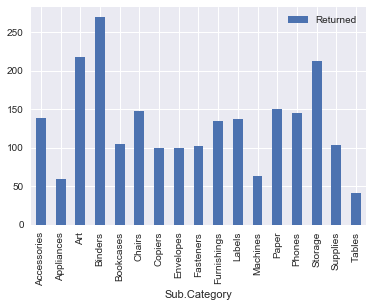

In [192]:
returned[['Sub.Category','Returned']].groupby('Sub.Category').agg('count').plot.bar()

In [193]:
order2 = pd.read_csv('Orders.csv')

In [200]:
order2['Order.Date'] = pd.to_datetime(order2['Order.Date'])
order2['Ship.Date'] = pd.to_datetime(order2['Ship.Date'])

In [202]:
order2['Process.Time'] = order2['Ship.Date'] - order2['Order.Date']

In [203]:
order2

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Process.Time
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,Technology,Phones,Samsung Convoy 3,$221.98,2,0.00,$62.15,40.770,High,2 days
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","$3,709.40",9,0.10,-$288.77,923.630,Critical,2 days
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,Technology,Phones,"Nokia Smart Phone, with Caller ID","$5,175.17",9,0.10,$919.97,915.490,Medium,1 days
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,Technology,Phones,"Motorola Smart Phone, Cordless","$2,892.51",5,0.10,-$96.54,910.160,Medium,2 days
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,Technology,Copiers,"Sharp Wireless Fax, High-Speed","$2,832.96",8,0.00,$311.52,903.040,Critical,1 days
5,22732,IN-2014-JM156557-41818,2014-06-28,2014-07-01,Second Class,JM-156557,Jim Mitchum,Corporate,NaN,Sydney,...,Technology,Phones,"Samsung Smart Phone, with Caller ID","$2,862.68",5,0.10,$763.28,897.350,Critical,3 days
6,30570,IN-2012-TS2134092-41219,2012-11-06,2012-11-08,First Class,TS-2134092,Toby Swindell,Consumer,NaN,Porirua,...,Furniture,Chairs,"Novimex Executive Leather Armchair, Adjustable","$1,822.08",4,0.00,$564.84,894.770,Critical,2 days
7,31192,IN-2013-MB1808592-41378,2013-04-14,2013-04-18,Standard Class,MB-1808592,Mick Brown,Consumer,NaN,Hamilton,...,Furniture,Tables,"Chromcraft Conference Table, Fully Assembled","$5,244.84",6,0.00,$996.48,878.380,High,4 days
8,40099,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,Furniture,Bookcases,"Sauder Facets Collection Library, Sky Alder Fi...",$341.96,2,0.00,$54.71,25.270,High,2 days
9,36258,CA-2012-AB10015140-40974,2012-03-06,2012-03-07,First Class,AB-100151404,Aaron Bergman,Consumer,98103.0,Seattle,...,Furniture,Chairs,"Global Push Button Manager's Chair, Indigo",$48.71,1,0.20,$5.48,11.130,High,1 days


In [227]:
df[['Product.ID','Returned']].count()

Product.ID    51290
Returned       2220
dtype: int64

In [259]:
df.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Discount,Profit,Shipping.Cost,Order.Priority,month,year,Returned,Order ID,Region_y,cat_returns
0,40098,CA-2014-AB10015140-41954,2014-11,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,0.0,62.15,40.77,High,11,2014,NaN,NaN,NaN,0
1,40099,CA-2014-AB10015140-41954,2014-11,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,0.0,54.71,25.27,High,11,2014,NaN,NaN,NaN,0
2,26341,IN-2014-JR162107-41675,2014-02,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,0.1,-288.77,923.63,Critical,2,2014,NaN,NaN,NaN,0
3,26339,IN-2014-JR162107-41675,2014-02,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,0.1,34.42,65.35,Critical,2,2014,NaN,NaN,NaN,0
4,26340,IN-2014-JR162107-41675,2014-02,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,0.1,-6.03,41.64,Critical,2,2014,NaN,NaN,NaN,0


In [239]:
y = df[['Returned']]

In [256]:
x = df.loc[:, df.columns != 'Returned']

In [260]:
class LabelCountEncoder(object):
    def __init__(self):
        self.count_dict = {}
    
    def fit(self, column):
        # This gives you a dictionary with level as the key and counts as the value
        count = column.value_counts().to_dict()
        # We want to rank the key by its value and use the rank as the new value
        # Your code here
        self.count_dict = dict(zip(count.index, range(len(count),0,-1)))
    
    def transform(self, column):
        # If a category only appears in the test set, we will assign the value to zero.
        missing = 0
        # Your code here
        
    
    def fit_transform(self, column):
        self.fit(column)
        return self.transform(column)

In [233]:
from sklearn.model_selection import StratifiedKFold

In [258]:
X = x
y = y
skf = StratifiedKFold(n_splits=5)
skf.get_n_splits(X,y)
np.random.seed(1)
for train_index,test_index in skf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TypeError: '>' not supported between instances of 'float' and 'str'

In [261]:
df.dtypes

Row.ID              int64
Order.ID           object
Order.Date         object
Ship.Date          object
Ship.Mode          object
Customer.ID        object
Customer.Name      object
Segment            object
Postal.Code       float64
City               object
State              object
Country            object
Region_x           object
Market             object
Product.ID         object
Category           object
Sub.Category       object
Product.Name       object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
Shipping.Cost     float64
Order.Priority     object
month               int64
year                int64
Returned           object
Order ID           object
Region_y           object
cat_returns         uint8
dtype: object